In [9]:
from pylab import*
%matplotlib inline

In [10]:
def RK4(ec, p_ini, x, args=0, h=0.01):
    if (x[1] - x[0]) <= 5.*h:
        h= (x[1] - x[0])/10
    tiempos=arange(x[0],x[1]+h,h)
    sol = zeros((len(tiempos),len(p_ini)))
    sol[0,:]=p_ini
    if args==0:
        for i in xrange(len(tiempos)-1):
            k_1=ec(sol[i,:],tiempos[i])
            k_2=ec(sol[i,:]+0.5*h*k_1,tiempos[i]+0.5*h)
            k_3=ec(sol[i,:]+0.5*h*k_2,tiempos[i]+0.5*h)
            k_4=ec(sol[i,:]+h*k_3,tiempos[i]+h)
            sol[i+1,:]= sol[i,:]+ (h/6.)*(k_1+2*k_2+2*k_3+k_4)
    else:
        for i in xrange(len(tiempos)-1):
            k_1=ec(sol[i,:],tiempos[i],args)
            k_2=ec(sol[i,:]+0.5*h*k_1,tiempos[i]+0.5*h,args)
            k_3=ec(sol[i,:]+0.5*h*k_2,tiempos[i]+0.5*h,args)
            k_4=ec(sol[i,:]+h*k_3,tiempos[i]+h,args)
            sol[i+1,:]= sol[i,:]+ (h/6.)*(k_1+2*k_2+2*k_3+k_4)
    return tiempos,sol


In [11]:
sin(30)

-0.98803162409286183

In [34]:
def e_mov(r_v,t,fric=0,g= 9.8,m=1):
    u =sqrt(r_v[2]**2+r_v[3]**2)
    dx = r_v[2]
    dy = r_v[3]
    if fric==0:
        dvx,dvy = 0,-(g/m)
        #print "No use un modelo de friccion"
    else:
        dvx = -fric([r_v[2],r_v[3]])[0]
        dvy = -(g/m) - fric([r_v[2],r_v[3]])[1]
        #print "Use un modelo de friccion"
    return array([dx,dy,dvx,dvy])

In [22]:
def fric_id(v):
    return array([0,0])

def fric_v(v,gamma=0.1):
    f_x = gamma*v[0]
    f_y = gamma*v[1]
    return array([f_x,f_y])

def fric_v2(v,gamma=0.1):
    norm_v = sqrt(v[0]**2 + v[1]**2)
    f_x = gamma*norm_v*v[0]
    f_y = gamma*norm_v*v[1]
    return array([f_x,f_y])

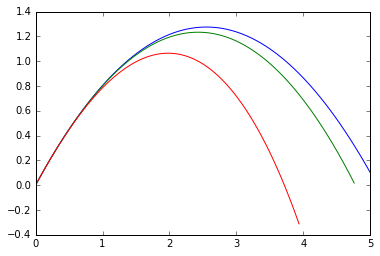

In [6]:
p=[0,0,5,5]
t,sol_id=RK4(e_mov,p,[0,1])
t,sol_fv=RK4(e_mov,p,[0,1],fric_v,.01)
t,sol_fv2=RK4(e_mov,p,[0,1],fric_v2)
plot(sol_id[:,0],sol_id[:,1])
plot(sol_fv[:,0],sol_fv[:,1])
plot(sol_fv2[:,0],sol_fv2[:,1])

In [7]:
print e_mov([1,1,1,1],1)
print e_mov([1,1,1,1],1,fric_id)
print e_mov([1,1,1,1],1,fric_v)
print e_mov([1,1,1,1],1,fric_v2)


[ 1.   1.   0.  -9.8]
[ 1.   1.   0.  -9.8]
[ 1.   1.  -0.1 -9.9]
[ 1.          1.         -0.14142136 -9.94142136]


In [8]:
print sol_fv2[80,:][1]
print sol_fv2[-1,:][1]

0.486963819865
-0.311193109272


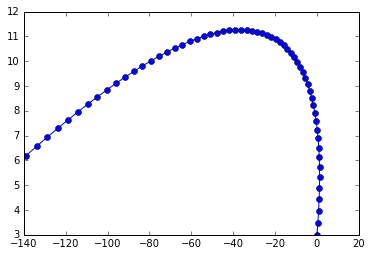

In [26]:
inicio= [0,3,5,5]
N = 60
trayectoria = zeros((N,len(inicio)))
mi_dt= .1
trayectoria[0,:]= array(inicio)
for i in range(N-1): # restamos el pinto inicial
    t,sol_dt = RK4(e_mov,trayectoria[i,:],[0,mi_dt],fric_v)
    if sol_dt[-1,:][1] <0 : # si cambia de signo
        """#print "buscando punto de rebote"
        #empezamos el algoritmo de biparticion 
        dt_busqueda = mi_dt/2
        y_izq = trayectoria[i,:] # toma el valor anterior, antes de que se de el cambio de signo
        t,sol = RK4(e_mov,trayectoria[i,:],[0,dt_busqueda],fric_v)# tomamos las 
        
        y_med = sol[-1,:] # se obtiene con el proceso integración 
        #print y_med
        while abs(y_izq[1]) > 1e-5: # mientras la coordenada de y de  yizquier
            if y_izq[1]*y_med[1] <0:
                reinicio = y_izq
            else:
                reinicio=y_med # si el producto entre y_iz e y_med es positivo, ahora toma el valor de y_med como el de la izquierda , empezamos de nuevo la busqueda de la raiz
            dt_busqueda = dt_busqueda/2 # disminuye el intervalo de la buaqueda para que converja mas rapido
            t,sol = RK4(e_mov,reinicio,[0,dt_busqueda],fric_v) # como modificamos el intervalo del tiempollegarael punto en que sera mucho mas pequeño que el paso de integración
            y_izq = reinicio
            y_med = sol[-1,:]
            
        y_izq = array([y_izq[0],y_izq[1],y_izq[2],-y_izq[3]]) #la tercera entrada nos cambia el signo de y para que suba
        """
        trayectoria[i+1,:] = y_izq
    else:
        trayectoria[i+1,:] = sol_dt[-1,:] # ultimo punto de la simulación, punto siguiente de la trayectoria
    
    
#plot(sol_fv[:,0],sol_fv[:,1],"o")
plot(trayectoria[:,0],trayectoria[:,1],"o-")

show()

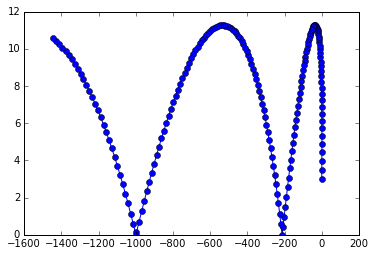

In [36]:
inicio= [0,3,5,5]
N = 180
trayectoria = zeros((N,len(inicio)))
mi_dt= .1
trayectoria[0,:]= array(inicio)
for i in range(N-1): # restamos el pinto inicial
    t,sol_dt = RK4(e_mov,trayectoria[i,:],[0,mi_dt],fric_v)
    if sol_dt[-1,:][1] <0 : # si cambia de signo
        punto = rebote(trayectoria[i,:],mi_dt)
        trayectoria[i+1,:] = punto
    else:
        trayectoria[i+1,:] = sol_dt[-1,:] # ultimo punto de la simulación, punto siguiente de la trayectoria
    
plot(trayectoria[:,0],trayectoria[:,1],"o-")

show()

Definimos una funcion con el algoritmo que define el movimiento



In [24]:
def rebote(r_v_i,mi_dt):  # r_i es la coordenada inicial
        dt_busqueda = mi_dt/2
        y_izq =r_v_i
        t,sol = RK4(e_mov,r_v_i,[0,dt_busqueda],fric_v)# tomamos las 
        y_med = sol[-1,:] # se obtiene con el proceso integración 
        while abs(y_izq[1]) > 1e-5: # mientras la coordenada de y de  yizquier
            if y_izq[1]*y_med[1] <0:
                reinicio = y_izq
            else:
                reinicio=y_med # si el producto entre y_iz e y_med es positivo, ahora toma el valor de y_med como el de la izquierda , empezamos de nuevo la busqueda de la raiz
            dt_busqueda = dt_busqueda/2 # disminuye el intervalo de la buaqueda para que converja mas rapido
            t,sol = RK4(e_mov,reinicio,[0,dt_busqueda],fric_v) # como modificamos el intervalo del tiempollegarael punto en que sera mucho mas pequeño que el paso de integración
            y_izq = reinicio
            y_med = sol[-1,:]  #
            
        y_izq = array([y_izq[0],y_izq[1],y_izq[2],-y_izq[3]]) #la tercera entrada nos cambia el signo de y para que suba
        return y_izq